In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # features
y = iris.target  # labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SVM Model
Experiment with the hyperparameters to see how it affects the model’s accuracy:
* try different C values
* switch the kernel parameter to 'rbf', 'poly', or 'sigmoid'

Model Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45



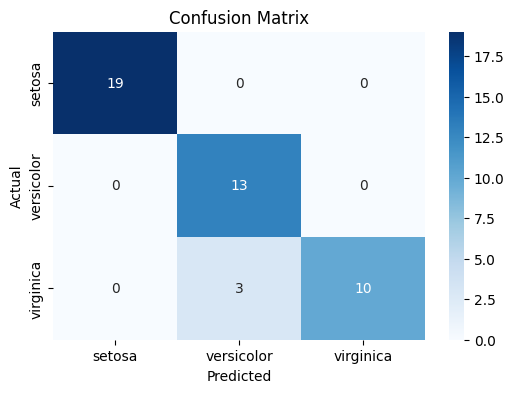

In [29]:

# Initialize the SVM model
svm_model = SVC(kernel='poly', C=0.001)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Random Forest Classifier
Experiment with the hyperparameters to see how it affects the model’s accuracy:
* **n_estimators**: number of trees in the forest
* **max_depth**: maximum depth of each tree
* **min_samples_split**: minimum samples required to split an internal node
* **criterion**: function to measure the quality of a split ('gini', 'entropy')

Random Forest Model Accuracy: 0.44
Classification Report (Random Forest):
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
  versicolor       0.27      0.54      0.36        13
   virginica       0.68      1.00      0.81        13

    accuracy                           0.44        45
   macro avg       0.32      0.51      0.39        45
weighted avg       0.28      0.44      0.34        45



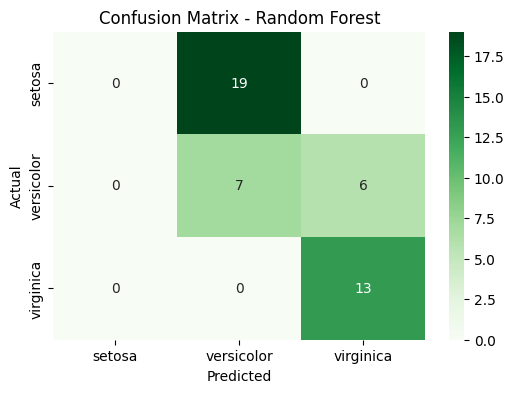

In [32]:
# Initialize the Random Forest model with default hyperparameters
rf_model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=2, criterion='entropy', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")

# Print classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))

# Create a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## XGBoost Classifier
Experiment with the hyperparameters to see how it affects the model’s accuracy:
* **n_estimators**: number of boosting rounds
* **max_depth**: maximum depth of each tree
* **learning_rate**: step size to scale the contribution of each tree
* **subsample**: percentage of samples used for each tree (to prevent overfitting)
* **colsample_bytree**: fraction of features to consider for each split

XGBoost Model Accuracy: 0.96
Classification Report (XGBoost):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



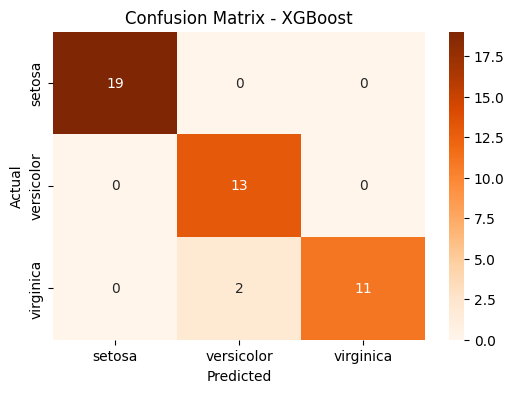

In [35]:
# Initialize the XGBoost model with default hyperparameters
xgb_model = XGBClassifier(n_estimators=1, max_depth=1, learning_rate=1, subsample=0.2, colsample_bytree=0.5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}")

# Print classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=iris.target_names))

# Create a confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Oranges', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()
